### Imports and Settings

In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

import SAGA
from SAGA.database import FitsTable
from easyquery import Query
from easyquery import QueryMaker
from SAGA import ObjectCuts as C

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}

plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['legend.frameon'] = False
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 4

### Load SAGA Data

In [3]:
saga = SAGA.QuickStart()
saga.set_default_base_version("paper2")
hosts = saga.host_catalog.load(include_stats=True)

SAGA `shared_dir` set to /Users/eon/Documents/PaperII
SAGA `local_dir`  set to /Users/eon/Documents/PaperII


In [4]:
completed_hosts = saga.host_catalog.load(query="paper2_complete", include_stats="remote")
observed_hosts = saga.host_catalog.load(query="paper2_observed", include_stats="remote")
bright_completed_hosts = saga.host_catalog.load(query="paper2_bright_complete", include_stats="remote")

In [5]:
hosts_p_nsat_total = np.load("EON_data/hosts_p_nsat_total.npz")

sats_num_draws = []

for i in range(10000):
    temp = np.zeros(21)
    rands = np.random.rand(len(completed_hosts))
    for j in range(len(completed_hosts)):
        temp[int(np.random.choice(np.linspace(0.,20.,21),1,p=hosts_p_nsat_total[completed_hosts[j]['HOSTID']]))]+=1
    sats_num_draws.append(temp)

In [6]:
saga_nums = np.zeros(15)

for host in completed_hosts:
    num_bright_sats = host['sats_Mr_limit']
    saga_nums[num_bright_sats] += 1

In [7]:
pred_total = np.load('EON_data/Nhost_Nsat_pred.npy')

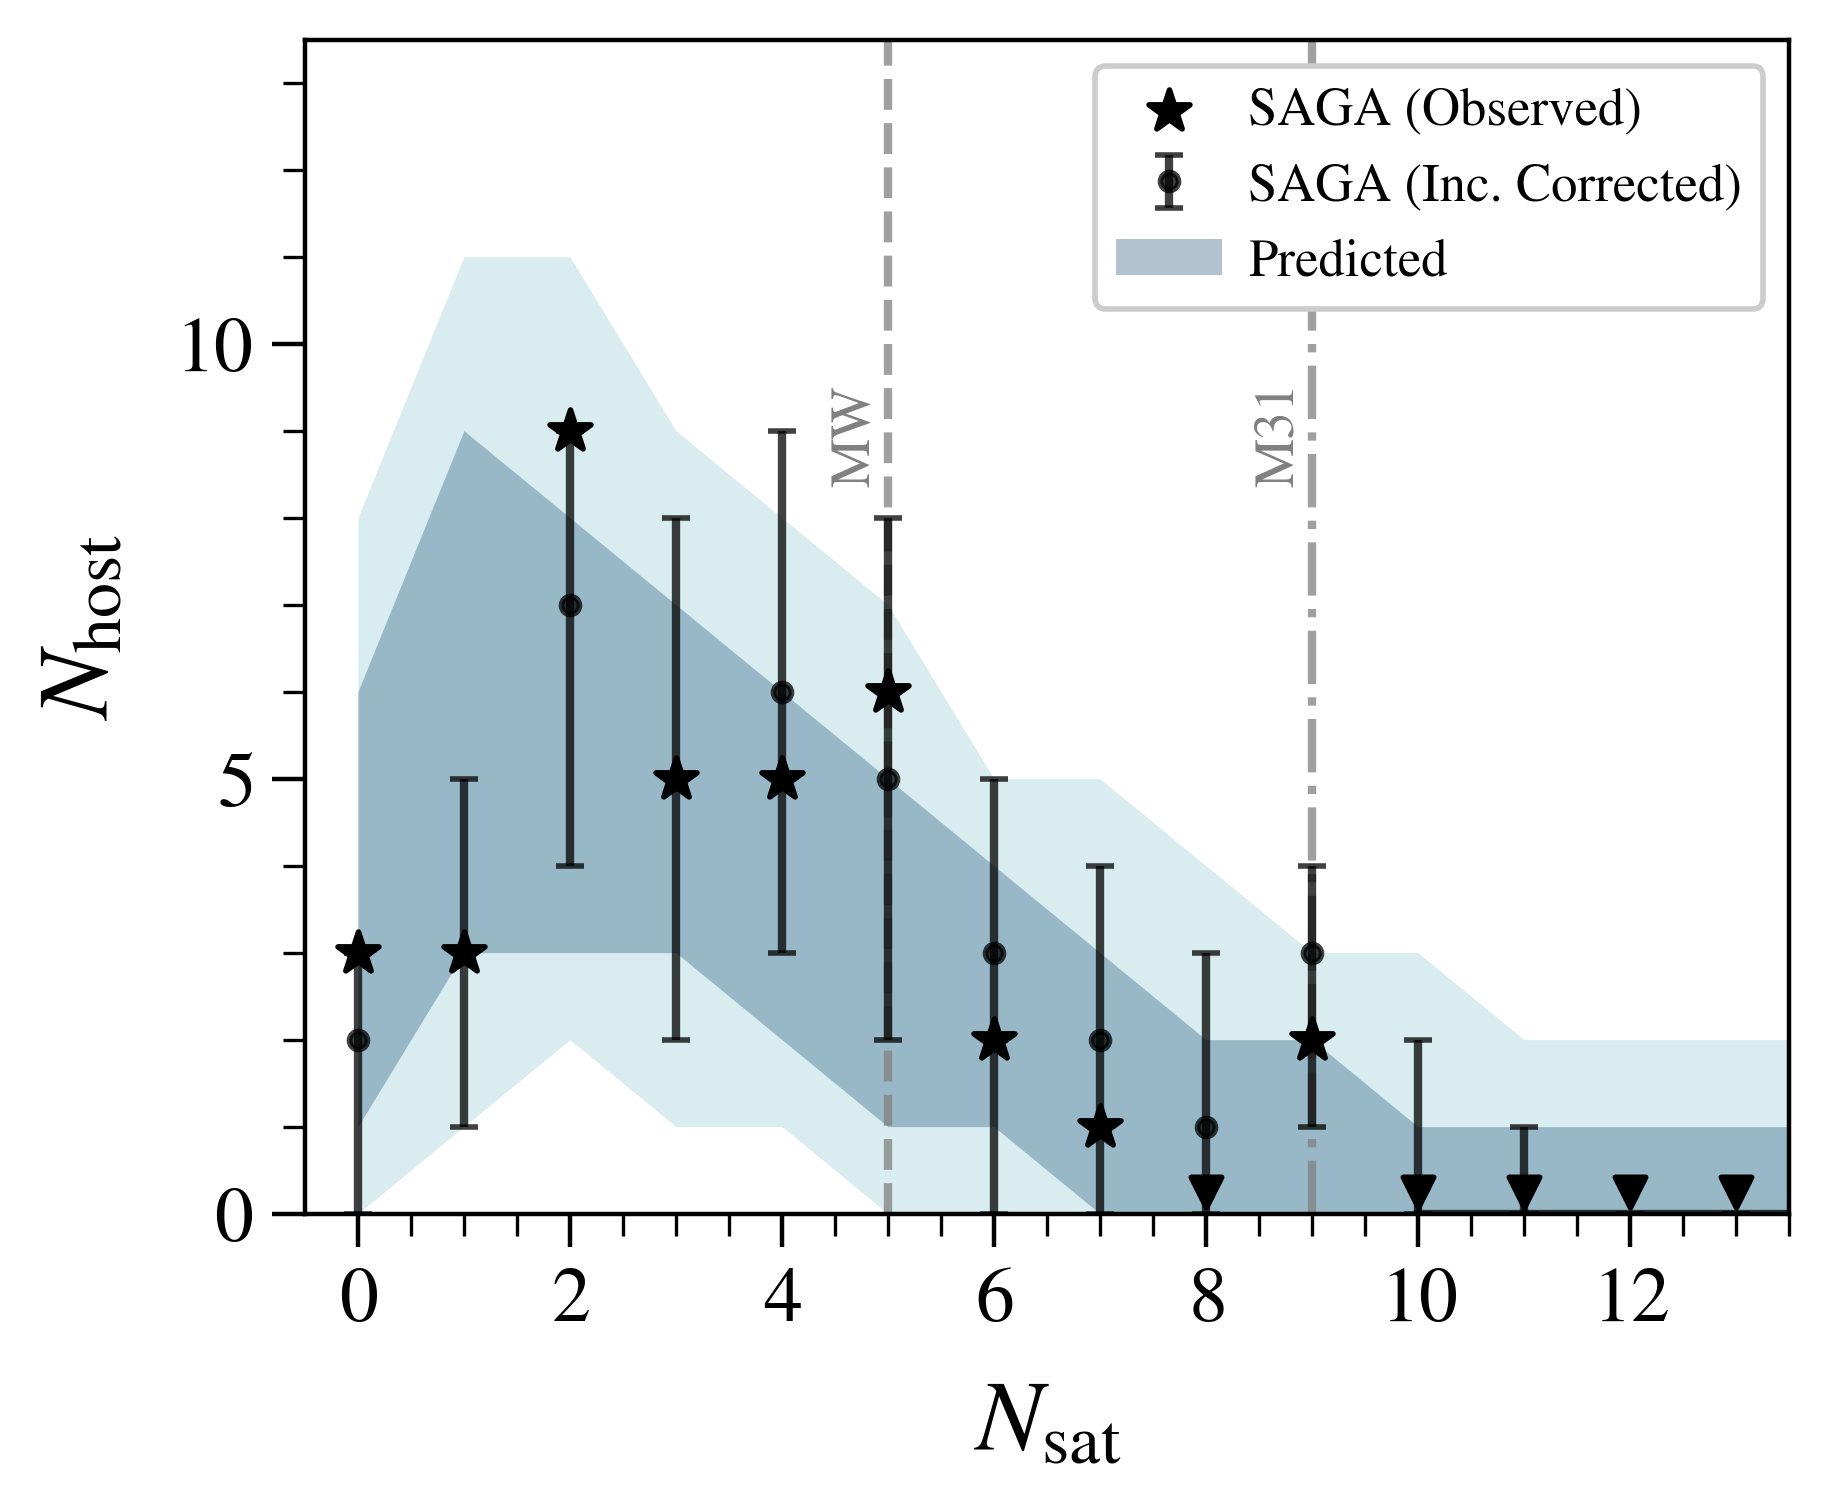

In [8]:
plt.figure(figsize=(4.8,4.))

obs = plt.scatter(np.linspace(0.,14.,15)[saga_nums!=0],saga_nums[saga_nums!=0],marker='*',s=60,color='k',
                  label=r'SAGA (Observed)',rasterized=True,zorder=999)

yerr_lower = np.median(sats_num_draws,axis=0)-np.quantile(sats_num_draws,0.025,axis=0)
yerr_upper = np.quantile(sats_num_draws,0.975,axis=0)-np.median(sats_num_draws,axis=0)

inc = plt.errorbar(np.linspace(0.,20.,21)[np.median(sats_num_draws,axis=0)!=0],
                   np.median(sats_num_draws,axis=0)[np.median(sats_num_draws,axis=0)!=0],
                   yerr=(yerr_lower[np.median(sats_num_draws,axis=0)!=0],yerr_upper[np.median(sats_num_draws,axis=0)!=0]),
                   color='k',alpha=0.75,capsize=2.5,fmt='o',markersize=3.25,linestyle='None',
                   label=r'SAGA (Inc. Corrected)',rasterized=True)

plt.errorbar(np.linspace(0.,20.,21)[np.median(sats_num_draws,axis=0)==0],
             np.median(sats_num_draws,axis=0)[np.median(sats_num_draws,axis=0)==0],
             yerr=(yerr_lower[np.median(sats_num_draws,axis=0)==0],yerr_upper[np.median(sats_num_draws,axis=0)==0]),
             color='k',alpha=0.75,capsize=2.5,rasterized=True)

plt.scatter(np.linspace(0.,14.,15)[saga_nums==0],0.25*np.ones(len(np.linspace(0.,14.,15)[saga_nums==0])),
            color='k',alpha=1.0,marker='v',s=30,zorder=999,rasterized=True)

#Prediction
pred = plt.fill_between(np.linspace(0.,74.,75),np.quantile(pred_total,0.16,axis=0),np.quantile(pred_total,0.84,axis=0),
                        facecolor="#003660",alpha=0.3,label=r'Predicted',rasterized=True)

plt.fill_between(np.linspace(0.,74.,75),np.quantile(pred_total,0.025,axis=0),np.quantile(pred_total,0.975,axis=0),
                 facecolor="#04859B",alpha=0.15,rasterized=True)

#MW
plt.plot(5.0*np.ones(10),np.linspace(0.0,13.5,10),c='gray',ls='--',alpha=0.75,zorder=1)
plt.text(4.45,8.5,'MW',rotation=90,fontsize=10,color='gray')

#M31
plt.plot(9.0*np.ones(10),np.linspace(0.0,13.5,10),c='gray',ls='-.',alpha=0.75,zorder=1)
plt.text(8.45,8.5,'M31',rotation=90,fontsize=10,color='gray')

#Ticks, labels, etc.
plt.xlim(-0.5,13.5)
plt.ylim(0.0,13.5)

plt.xticks([0,2,4,6,8,10,12],[r'$0$',r'$2$',r'$4$',r'$6$',r'$8$',r'$10$',r'$12$'],fontsize=14)
plt.yticks([0,5,10],[r'$0$',r'$5$',r'$10$'],fontsize=14)

plt.xlabel(r'$N_{\rm{sat}}$',fontsize=18,labelpad=8)
plt.ylabel(r'$N_{\rm{host}}$',fontsize=18,labelpad=8)

plt.legend(handles=[obs,inc,pred],loc=1,handletextpad=0.5,fontsize=9.5,frameon=True,framealpha=1.0)

plt.tight_layout()
plt.savefig('Nhost_Nsat_pred.pdf')
plt.show()